In [1]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

In [2]:
df=pd.read_csv('iris.csv',header=None, names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

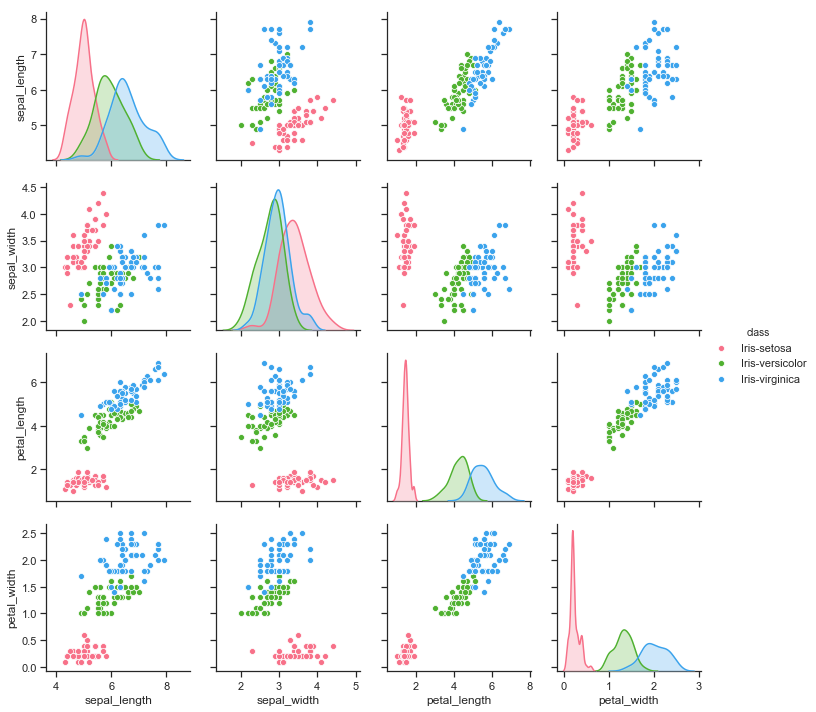

In [4]:
i=sns.pairplot(df,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='class',palette='husl')

In [5]:
x=df.drop('class',axis=1)

In [6]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [8]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)
kmeans.fit(x_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [9]:
centroids=kmeans.cluster_centers_
centroids

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [10]:
cov_mat=np.cov(x_std.T)
print("conventional matrix\n%s",cov_mat)

conventional matrix
%s [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [11]:
cov_mat.shape

(4, 4)

In [12]:
eigenvalues,eigenvactors=np.linalg.eig(cov_mat)

In [13]:
print('Eigen Value \n%s',eigenvalues)
print('Eigen vectors \n%s',eigenvactors)

Eigen Value 
%s [2.93035378 0.92740362 0.14834223 0.02074601]
Eigen vectors 
%s [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [14]:
tot=sum(eigenvalues)
var_exp=[(i/tot)*100 for i in sorted (eigenvalues,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Cumulative variance explained',cum_var_exp)

Cumulative variance explained [ 72.77045209  95.80097536  99.48480732 100.        ]


In [18]:
sum(eigenvalues)

4.026845637583894

In [17]:
# percentage of 2nd eigen value
0.92740362/sum(eigenvalues)

0.2303052322999999

In [20]:
# make a set of (eigenvalues, eigenvectors) pairs
eig_pair=[(eigenvalues[index],eigenvactors[:,index])for index in range(len(eigenvalues))]

In [21]:
(eigenvalues[0],eigenvactors[:,0])

(2.9303537755893165,
 array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))

In [22]:
eig_pair

[(2.9303537755893165,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173417,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1483422264816399,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559571,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [23]:
eig_pair.sort()#to arrange in assending order

In [24]:
eig_pair# after assending

[(0.02074601399559571,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])),
 (0.1483422264816399,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.9274036215173417,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (2.9303537755893165,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]

In [25]:
eig_pair.reverse()# to decending the data

In [26]:
eig_pair# after decending
#after that eigan values are not required

[(2.9303537755893165,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173417,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1483422264816399,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559571,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [28]:
#Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort=[eig_pair[index][0] for index in range(len(eigenvalues))]
eigvectors_sort=[eig_pair[index][1] for index in range(len(eigenvactors))]
#lets conform oour sorting worked print out eigenvalues
print('Eigenvalues in decending order: \n%s'%eigvalues_sort)

Eigenvalues in decending order: 
[2.9303537755893165, 0.9274036215173417, 0.1483422264816399, 0.02074601399559571]


In [29]:
type(eigvalues_sort)

list

In [30]:
type(eigvectors_sort)

list

In [31]:
eigvectors_sort #Eigen vector is rowwise

[array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]),
 array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]),
 array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]),
 array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])]

In [32]:
eigvectors_sort[0:2]

[array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]),
 array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])]

In [44]:
p_re=np.array(eigvectors_sort[0:2]).transpose()
p_re.shape

(4, 2)

In [45]:
p_re

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [36]:
proj_data_2d=np.dot(x_std,p_re)
proj_data_2d.shape

(150, 2)

In [37]:
proj_data_2d[:,0]

array([-2.26454173, -2.0864255 , -2.36795045, -2.30419716, -2.38877749,
       -2.07053681, -2.44571134, -2.23384186, -2.34195768, -2.18867576,
       -2.16348656, -2.32737775, -2.22408272, -2.63971626, -2.19229151,
       -2.25146521, -2.20275048, -2.19017916, -1.89407429, -2.33994907,
       -1.91455639, -2.2046454 , -2.77416979, -1.82041156, -2.2282175 ,
       -1.95702401, -2.05206331, -2.16819365, -2.14030596, -2.26879019,
       -2.14455443, -1.8319381 , -2.60820287, -2.43795086, -2.18867576,
       -2.2111199 , -2.04441652, -2.18867576, -2.4359522 , -2.1705472 ,
       -2.28652724, -1.87170722, -2.55783442, -1.96427929, -2.13337283,
       -2.07535759, -2.38125822, -2.39819169, -2.22678121, -2.20595417,
        1.10399365,  0.73248144,  1.24210951,  0.39730728,  1.07259395,
        0.38445815,  0.74871508, -0.49786339,  0.92622237,  0.00496803,
       -0.12469746,  0.43873012,  0.55163398,  0.71716507, -0.03725838,
        0.87589054,  0.3480064 ,  0.15339254,  1.21530321,  0.15

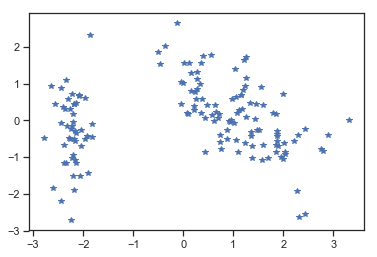

In [38]:
plt.plot(proj_data_2d[:,0],proj_data_2d[:,1],'*')

In [39]:
kmeans_pca=KMeans(n_clusters=3,n_init=15,random_state=2)
kmeans_pca.fit(proj_data_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [40]:
kmeans_pca.inertia_

116.10924021401532

#### Calculating with 3 features

In [42]:
p_re3=np.array(eigvectors_sort[0:3]).transpose()
p_re3.shape

(4, 3)

In [43]:
p_re3

array([[ 0.52237162, -0.37231836, -0.72101681],
       [-0.26335492, -0.92555649,  0.24203288],
       [ 0.58125401, -0.02109478,  0.14089226],
       [ 0.56561105, -0.06541577,  0.6338014 ]])

In [46]:
proj_data_3d=np.dot(x_std,p_re3)
proj_data_3d.shape

(150, 3)

In [47]:
proj_data_3d[:,0]

array([-2.26454173, -2.0864255 , -2.36795045, -2.30419716, -2.38877749,
       -2.07053681, -2.44571134, -2.23384186, -2.34195768, -2.18867576,
       -2.16348656, -2.32737775, -2.22408272, -2.63971626, -2.19229151,
       -2.25146521, -2.20275048, -2.19017916, -1.89407429, -2.33994907,
       -1.91455639, -2.2046454 , -2.77416979, -1.82041156, -2.2282175 ,
       -1.95702401, -2.05206331, -2.16819365, -2.14030596, -2.26879019,
       -2.14455443, -1.8319381 , -2.60820287, -2.43795086, -2.18867576,
       -2.2111199 , -2.04441652, -2.18867576, -2.4359522 , -2.1705472 ,
       -2.28652724, -1.87170722, -2.55783442, -1.96427929, -2.13337283,
       -2.07535759, -2.38125822, -2.39819169, -2.22678121, -2.20595417,
        1.10399365,  0.73248144,  1.24210951,  0.39730728,  1.07259395,
        0.38445815,  0.74871508, -0.49786339,  0.92622237,  0.00496803,
       -0.12469746,  0.43873012,  0.55163398,  0.71716507, -0.03725838,
        0.87589054,  0.3480064 ,  0.15339254,  1.21530321,  0.15

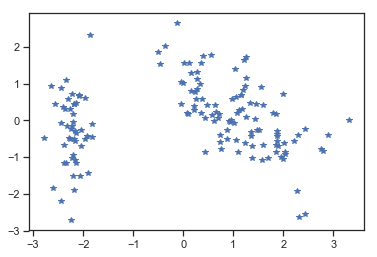

In [48]:
plt.plot(proj_data_3d[:,0],proj_data_3d[:,1],'*')

In [49]:
kmeans_pca3=KMeans(n_clusters=3,n_init=15,random_state=2)
kmeans_pca3.fit(proj_data_3d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [50]:
kmeans_pca3.inertia_

137.97308684244518

Text(0.5, 0.92, '3D plot of kmeans Clustering')

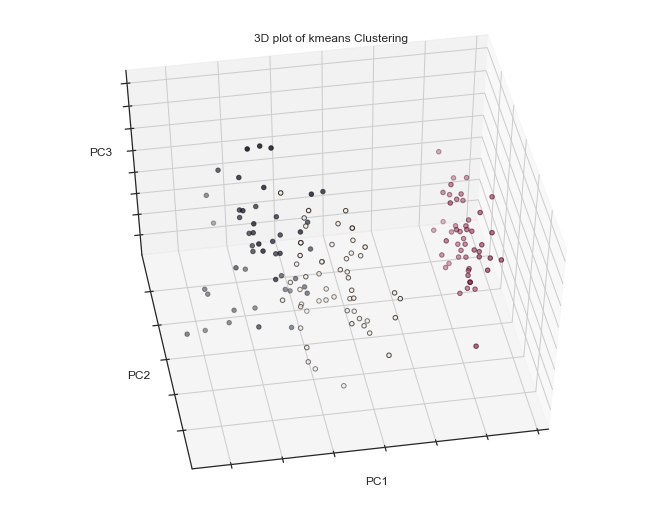

In [65]:
fig=plt.figure(figsize=(9,7))
ax=Axes3D(fig,rect=[0,0,1,1],elev=50,azim=80)
#kmeans.fit(dfz)
L=kmeans_pca.labels_
ax.scatter(proj_data_3d[:,0],proj_data_3d[:,1],proj_data_3d[:,2],
          c=labels.astype(np.float),edgecolor='K')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D plot of kmeans Clustering')

In [57]:
centroids.shape

(3, 2)

In [63]:
centroids=kmeans_pca.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=['pc1','pc2'])
centroid_df

,pc1,pc2
0,1.722369,-0.599905
1,-2.220193,-0.292225
2,0.567138,0.807675


In [64]:
centroids

array([[ 1.72236912, -0.59990509],
       [-2.22019328, -0.29222482],
       [ 0.56713803,  0.8076751 ]])

In [67]:
centroids=kmeans_pca3.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=['pc1','pc2','pc3'])
centroid_df

,pc1,pc2,pc3
0,0.567138,0.807675,0.050886
1,-2.220193,-0.292225,-0.043955
2,1.722369,-0.599905,-0.010622
